<a href="https://colab.research.google.com/github/PEJ12/Data_Science/blob/main/W7L1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PNUCSE 데이터과학입문  
## 7주차 실습자료 (1)
### 교강사: 박영진, youngjinpark@pusan.ac.kr
---

## 실습 목표

- 회귀에 대하여 이해하고 선형회귀를 실습을 통해 적용할 수 있다.

공부완료

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def make_reg_plot(X, y, y_pred):
    # Plot data points and regression line
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
    #X에 대한 예측값(y값)으로 선 그래프 그리기(plot)
    plt.legend()
    plt.xlabel('$X$')
    plt.ylabel('$y$',rotation=0)
    plt.title('Linear Regression')
    plt.show()

<h3>Data generation</h3>

<Axes: >

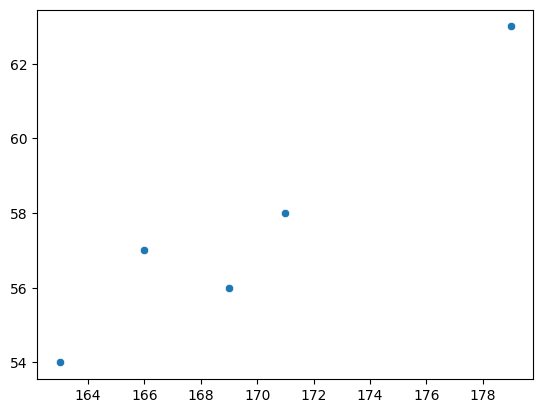

In [ ]:
X = [163, 179, 166, 169, 171]
y = [54, 63, 57, 56, 58]
sns.scatterplot(x=X, y=y)

In [ ]:
X = [[x] for x in X]
print(X)

[[163], [179], [166], [169], [171]]


In [ ]:
model = LinearRegression() # Make a model
model.fit(X, y) # Train
y_pred = model.predict(X) # Prediction
#predict() 함수는 X(입력 데이터) 를 받아서, 그에 대한 예측 결과(예측된 y 값) 를 반환

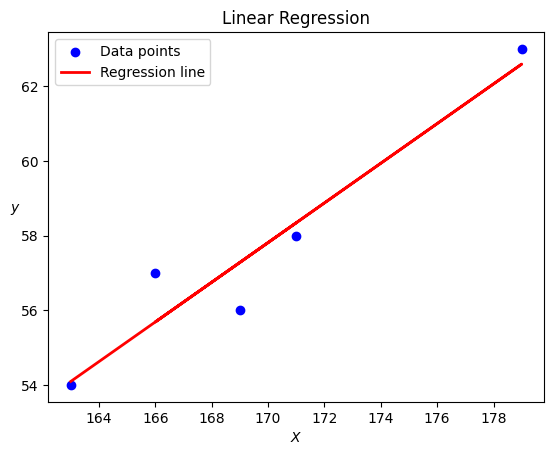

In [ ]:
make_reg_plot(X, y, y_pred)

In [ ]:
# Make data with sklearn.datasets.make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
#n_feature는 독립변수의 개수로 2가 되면 열이 2개가 됨

In [ ]:
#print(X)
print(X.shape) #X는 2차원 배열 -> scatterplot 할 때 ravel()로 1차원 배열로 평탄화
print(y.shape) #1차원 배열
#print(y)

(100, 1)
(100,)


<Axes: >

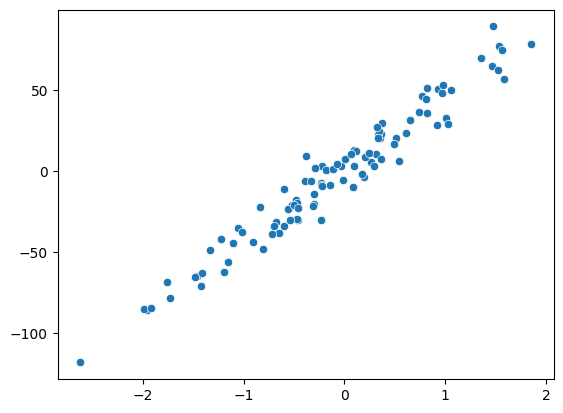

In [ ]:
sns.scatterplot(x=X.ravel(), y=y)

<h3>Do linear regression</h3>

In [ ]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
print(f"기울기 w: {model.coef_[0]:.2f}")
print(f"절편  b: {model.intercept_:.2f}")

기울기 w: 44.44
절편  b: 1.17


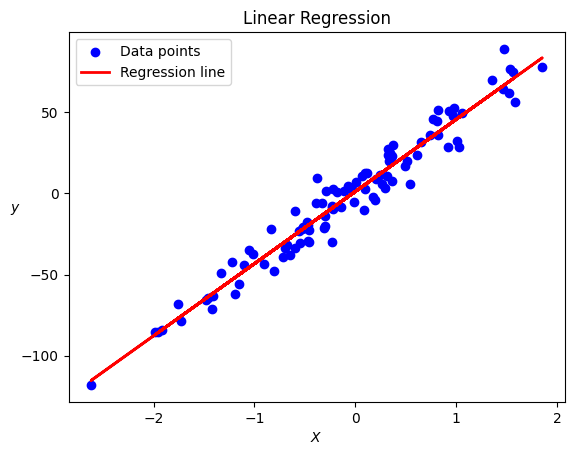

In [ ]:
make_reg_plot(X, y, y_pred)

<h3>Evaluate our regression</h3>

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
mae = mean_absolute_error(y, y_pred)
print(f"MAE: {mae:.2f}")

MAE: 7.10


In [ ]:
mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse:.2f}")

MSE: 78.05


밑의 코드 추가공부

y ≈ w * X 형태의 선형 모델에서, 다양한 w 값을 적용해보고 그에 따른 **MSE(예측값과 실제값 차이의 제곱 평균)**을 계산해서, MSE가 가장 작아지는 최적의 w를 찾아보는 과정

**w_list**: 0.75부터 1.25까지의 50개 w값을 균등하게 생성

**w**는 기울기 역할을 하는 파라미터

**mse_list**: 각 w에 대해 MSE 값을 저장한 리스트

w 값에 따라 MSE가 어떻게 변하는지 그래프로 시각화한다.

곡선 형태로 나타나며, MSE가 가장 작아지는 w가 최적의 파라미터

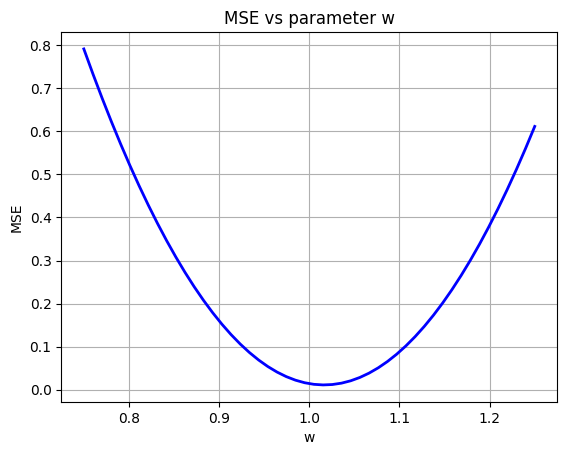

In [ ]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([1.2, 1.9, 3.0, 4.1, 5.1])

w_list = np.linspace(0.75, 1.25, 50)
mse_list = [ mean_squared_error(y, w * X) for w in w_list ]

plt.plot(w_list, mse_list, color='blue', linewidth=2)
plt.title('MSE vs parameter w')
plt.xlabel('w')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

 아래 코드 추가 공부

 **어떤 w 값에서 MSE가 가장 작은지**를 찾는 코드

 zip을 활용해 w와 MSE 묶기

 w_list와 mse_list를 하나씩 짝지어서 튜플 리스트로 만든다.

예: [(0.75, 0.225), (0.76, 0.198), ...]

이 리스트의 각 요소는 **(w 값, 해당 w에서의 MSE)**이다.

min으로 리스트 중 MSE가 가장 작은 튜플을 찾는다.

 min_mse_w = (1.01, 0.0037) 이런 형태

In [ ]:
w_mse_tuple = list(zip(w_list, mse_list))
w_mse_tuple
min_mse_w = min(w_mse_tuple, key=lambda item: item[1])
print(f'Minimum MSE: {min_mse_w[1]:.3f}, w: {min_mse_w[0]:.3f}')

Minimum MSE: 0.011, w: 1.015


<h3>Evaluate R-square</h3>

In [ ]:
# Make data again
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
# R-square
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print(f"R-square: {r2*100:.2f}%")

Do linear regression with our datasets

[Iris] R-square: 92.71%


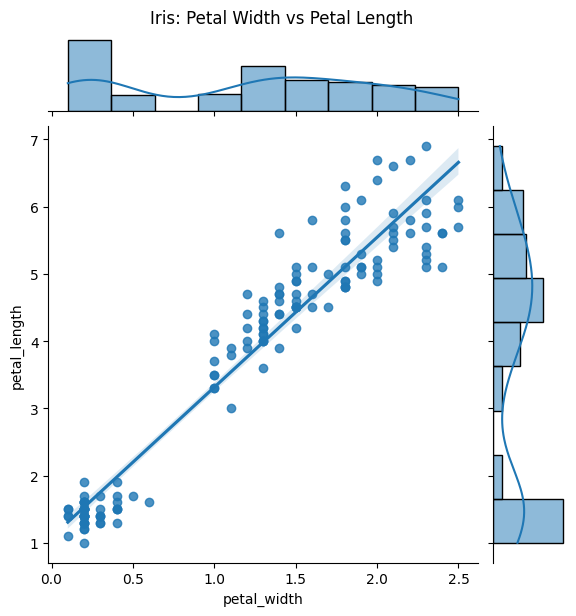

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

df = sns.load_dataset("iris")

X = df[['petal_width']]
#[['petal_width']]: 이중 대괄호로 컬럼 하나를 "데이터프레임" 형태로 선택
y = df['petal_length']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"[Iris] R-square: {r2*100:.2f}%")

sns.jointplot(data=df, x="petal_width", y="petal_length", kind="reg")
#sns.jointplot: Seaborn 라이브러리의 산점도 + 히스토그램을 함께 그리는 함수
#kind="reg": 회귀선(regression line) 을 포함한 산점도를 그림
plt.suptitle("Iris: Petal Width vs Petal Length", y=1.02)
#plt.suptitle(): 전체 그림의 제목을 설정하는 함수
#y=1.02: 제목의 위치를 살짝 위쪽으로 올림
plt.show()

[Penguins] R-square: 42.65%


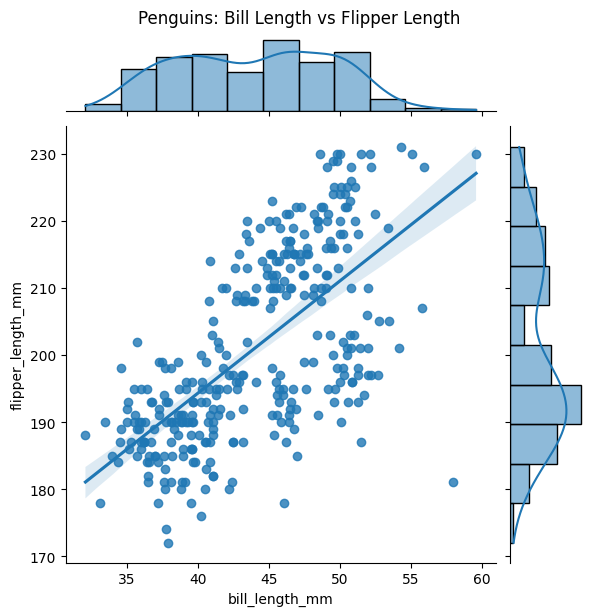

In [ ]:
penguins = sns.load_dataset("penguins").dropna()
# dropna()는 결측값(NaN)이 있는 행(row)을 제거
X = penguins[['bill_length_mm']]
y = penguins['flipper_length_mm']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"[Penguins] R-square: {r2*100:.2f}%")

sns.jointplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", kind="reg")
plt.suptitle("Penguins: Bill Length vs Flipper Length", y=1.02)
plt.show()